In [ ]:
#Upload data from device
from google.colab import files
uploaded = files.upload()

Saving balanced_dataset.csv to balanced_dataset.csv


In [ ]:
#reading the data
import pandas as pd
df = pd.read_csv('balanced_dataset.csv')
df

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE
...,...,...
17835,great location pay stayed palace times visit s...,NEGATIVE
17836,"simply awful, hotel bad state repair, time sta...",NEGATIVE
17837,This was my second time staying here with my d...,POSITIVE
17838,n't worry old reviews just returned staying hi...,POSITIVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17840 entries, 0 to 17839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  17840 non-null  object
 1   label   17840 non-null  object
dtypes: object(2)
memory usage: 278.9+ KB


In [ ]:
df['label'].value_counts()

,count
label,
POSITIVE,8920
NEGATIVE,8920


In [ ]:
#check if there are unknown data meaning
def check_unknown_words(text):
    import re
    pattern = '[^\x00-\x7F]+'
    return re.findall(pattern, text)

df['unknown_words'] = df['review'].apply(check_unknown_words)
df['unknown_words']

,unknown_words
0,[]
1,[]
2,[]
3,[]
4,[Çî]
...,...
17835,[Ç]
17836,[]
17837,[…]
17838,[]


In [ ]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
# convert it to meaningful words
from deep_translator import GoogleTranslator

def translate_text(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print(f"Error: {e}")
        return text

df['review'] = df['review'].apply(translate_text)


print(df[['review']].head(936))

Streaming output truncated to the last 5000 lines.
Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
E

In [ ]:
# text lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['label'] = df['label'].str.lower()


print(df.head())

                                              review     label unknown_words
0  not bad stay pretty pleasant, alarm going 3 no...  positive            []
1  westin times square cheats customer starwood p...  negative            []
2  good news/ bad news seattle just night opted l...  positive            []
3  expectations booked riu bambu online having st...  negative            []
4  hospital stayed 2 weeks got sick stomach upset...  negative          [Çî]


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.0 MB/s eta 0:00:00


In [ ]:
#check if data has emojis
import emoji

def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in str(text))

df['has_emoji'] = df['review'].apply(contains_emoji)

df_with_emojis = df[df['has_emoji'] == True]
print(df_with_emojis.head())


                                                review     label  \
77   worst 👎👎👎👎👎. never go there they are theif. th...  negative   
162  this is not a place ; this is an emotion. the ...  positive   
261  very nice use and student friendly means pocke...  negative   
275  the breakfast and dinner options were fabulous...  positive   
307  paris hiccaps, succumbing rave reviews similar...  positive   

                                         unknown_words  has_emoji  
77                                          [👎👎👎👎👎, …]       True  
162                                          [😍, ’, …]       True  
261  [খুবই, সুন্দর, ব্যবহার, এবং, মানে, পকেট, 😂।, আ...       True  
275                                             [😃, …]       True  
307                       [Çî, Ç, é, Ç, é, Ä, Ç, ©¢]       True  


In [ ]:
# Convert emojis into words
!pip install emot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Importing libraries
from emot.emo_unicode import UNICODE_EMOJI,EMOTICONS_EMO

# Function for converting emojis into words
def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text


df['review'] = df['review'].apply(converting_emojis)

print(df['review'].head(308))


0      not bad stay pretty pleasant, alarm going 3 no...
1      westin times square cheats customer starwood p...
2      good news/ bad news seattle just night opted l...
3      expectations booked riu bambu online having st...
4      hospital stayed 2 weeks got sick stomach upset...
                             ...                        
303    great place stay, clean large rooms friendly h...
304    the worst hotel in bolpur. receptionist, staff...
305    don't be fooled with the look of the images sh...
306    this hotel is designed, managed and staffed to...
307    paris hiccaps, succumbing rave reviews similar...
Name: review, Length: 308, dtype: object


In [ ]:
# remove Non-ASCII characters
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', str(x)))


In [ ]:
#Removing Punctuation
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s\']', '', str(x)))
df['review']

,review
0,not bad stay pretty pleasant alarm going 3 no ...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed 2 weeks got sick stomach upset...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
#Remove extra spaces
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# Remove unnecessary numbers
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review']

,review
0,not bad stay pretty pleasant alarm going no p...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed weeks got sick stomach upsets...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
!pip uninstall -y torch
!pip install torch==2.0.1
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.6 MB/s eta 0:00:0

In [ ]:
# spacy to To exclude negative words from stop words
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# to extract negative words using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_negation_words_spacy(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.dep_ == "neg"]

In [ ]:
negation_words = ['no', 'not', 'nor', "don't","doesn't","never", "didn't", "can't", "won't", "couldn't", "shouldn't", "wouldn't", "n't"]

# combine all negative words
def get_all_negation_words(text):

    neg_spacy = extract_negation_words_spacy(text)

    tokens = text.lower().split()
    manual_found = [word for word in negation_words if word in tokens]

    return list(set(neg_spacy + manual_found))

df['negation_words'] = df['review'].apply(get_all_negation_words)

In [ ]:
#Removing Stop Words
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
all_negation_words = list(set(df['negation_words'].explode().dropna()))
custom_stop = [word for word in stop if word not in all_negation_words]


df['review'] = df['review'].apply(lambda x: " ".join(word for word in x.split() if word not in custom_stop))
df['review']

,review
0,not bad stay pretty pleasant alarm going no pr...
1,westin times square cheats customer starwood p...
2,good news bad news seattle night opted locatio...
3,expectations booked riu bambu online stayed ri...
4,hospital stayed weeks got sick stomach upsets ...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,second time staying daughter husbands first re...
17838,n't worry old reviews returned staying hilton ...


In [ ]:
#import necessary libraries for tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
#Tokenizing Text
from nltk.tokenize import word_tokenize

df['review_tokens'] = df['review'].apply(lambda x: word_tokenize(str(x)))
print(df[['review', 'review_tokens']].head())

                                              review  \
0  not bad stay pretty pleasant alarm going no pr...   
1  westin times square cheats customer starwood p...   
2  good news bad news seattle night opted locatio...   
3  expectations booked riu bambu online stayed ri...   
4  hospital stayed weeks got sick stomach upsets ...   

                                       review_tokens  
0  [not, bad, stay, pretty, pleasant, alarm, goin...  
1  [westin, times, square, cheats, customer, star...  
2  [good, news, bad, news, seattle, night, opted,...  
3  [expectations, booked, riu, bambu, online, sta...  
4  [hospital, stayed, weeks, got, sick, stomach, ...  


In [ ]:
#install necessary libariries
nltk.download('wordnet')
nltk.download('omw-1.4') #for post-of_speech method
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#POS for making lemmatization more effecient
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#Lemmatize the data using  WordNetLemmatizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens):
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word, tag in pos_tags:

        wordnet_pos = get_wordnet_pos(tag)

        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words


df['review_lemmatized'] = df['review_tokens'].apply(lemmatize_tokens)
print(df[['review_tokens', 'review_lemmatized']].head())

                                       review_tokens  \
0  [not, bad, stay, pretty, pleasant, alarm, goin...   
1  [westin, times, square, cheats, customer, star...   
2  [good, news, bad, news, seattle, night, opted,...   
3  [expectations, booked, riu, bambu, online, sta...   
4  [hospital, stayed, weeks, got, sick, stomach, ...   

                                   review_lemmatized  
0  [not, bad, stay, pretty, pleasant, alarm, go, ...  
1  [westin, time, square, cheat, customer, starwo...  
2  [good, news, bad, news, seattle, night, opt, l...  
3  [expectation, book, riu, bambu, online, stay, ...  
4  [hospital, stay, week, get, sick, stomach, ups...  


In [ ]:
#Compute the frequency of all words in the reviews
from nltk.probability import FreqDist

all_text = ' '.join(df['review_lemmatized'].apply(lambda x: ' '.join(x)))
freq_dist = FreqDist(all_text.split())
freq_dict = dict(freq_dist)
freq_dist

FreqDist({'room': 29007, 'hotel': 28196, 'not': 21091, 'stay': 14940, 'good': 11338, "n't": 11078, 'staff': 9355, 'read': 8962, 'great': 8694, 'no': 7851, ...})

In [ ]:
!pip install wordcloud

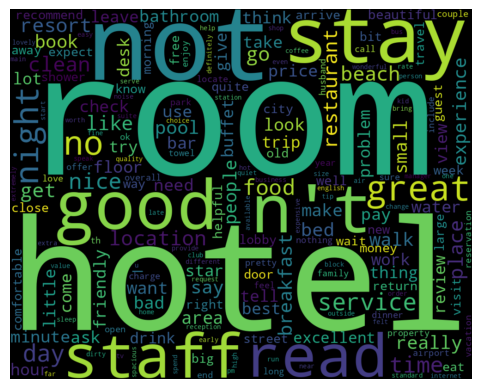

In [ ]:
# Build a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_review = WordCloud(width=1000, height=800, background_color='black').generate_from_frequencies(freq_dict)
plt.imshow(cloud_review, interpolation='bilinear')

plt.axis('off')
plt.show()

In [ ]:
?WordCloud

In [ ]:
new_df=df[['review_lemmatized', 'label']].copy()

In [ ]:
# حفظ الداتا الجديدة بعمود قائم فعليًا كقائمة
new_df.to_csv("processed_reviews.csv", index=False)


In [ ]:
from google.colab import files
files.download("processed_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>